# 项目简介

## 题目要求
利用海表面温度月平均资料sstmnmean.nc，进行以下数据分析并绘图。
(1) 对热带太平洋区域海温进行EOF(Empirical Orthogonal Function)分析，海温区域选取为-20~20°N、130~290°E，时间为1979~2021年的每年夏季(6~8月)。将EOF空间场的前两个模态绘制在一幅图上，要求使用一页多图方法绘制填色图，对图片进行修饰以达到一定程度的美观。

## 题目来源
2022年NUIST气象学专业《Linux和Python气象应用》课程考试

## 项目内容
美化&修改《热带太平洋区域海温(SST) EOF分析》

## 配套教程视频
b站【啵啵鼠宝】，气象科研绘图系列1~5期
气象科研绘图1：https://www.bilibili.com/video/BV1yY4y1E7z2?share_source=copy_web
本期内容简介：热带太平洋区域海温(SST) EOF分析存在的问题——从哪些角度去美化一张论文插图，让它接近sci插图的标准（？）

# Before 原始代码（已整理）

C:\ProgramData\Anaconda3\lib\site-packages\xarray\backends\cfgrib_.py:27: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


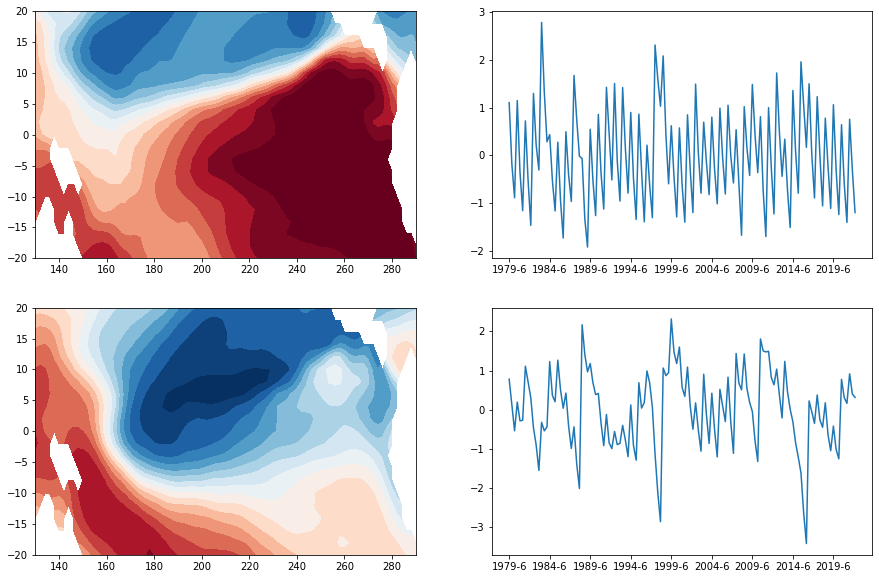

In [1]:
import netCDF4 as nc
import datetime as dt
import numpy as np
from eofs.standard import Eof
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

#导入文件
filename = r'C:/Users/LULU/Desktop/sstmnmean.nc'
f = nc.Dataset(filename)

#读取数据
lat = f.variables['lat'][34:55]
lon = f.variables['lon'][65:146]
time1 = list(f.variables['time'][:])
time_index = []
years = [i for i in range(1979,2022)]
months = [6,7,8]
dates = []
x = []
for year in years:
    for month in months:
        day = dt.datetime.strptime(str(year)+'-'+str(month)+'-1', '%Y-%m-%d')-dt.datetime.strptime('1800-1-1', '%Y-%m-%d')
        x.append(str(year)+'-'+str(month))
        dates.append(day.days)        
for day in dates:
    time_index.append(time1.index(day))
sst = f.variables['sst'][time_index,34:55,65:146]

#计算纬度权重
lat0 = np.array(lat)
coslat = np.cos(np.deg2rad(lat0))
wgts = np.sqrt(coslat)[..., np.newaxis]

#EOF
eof = Eof(sst,weights=wgts)
u_eof = eof.eofsAsCorrelation(neofs=2)
u_pc = eof.pcs(npcs=2, pcscaling=1)
u_var = eof.varianceFraction(neigs=2)

#画图网格
X,Y = np.meshgrid(lon,lat)

#画图
fig = plt.figure(figsize=(15,10))
ax1 = plt.subplot(2,2,1)
ax1.contourf(X,Y,u_eof[0,:,:], levels=np.arange(-0.8,0.9,0.1), extend = 'both',zorder=0, cmap=plt.cm.RdBu_r)
ax2 = plt.subplot(2,2,2)
ax2.plot(x,u_pc[:,0])
ax2.xaxis.set_major_locator(MultipleLocator(15))
ax3 = plt.subplot(2,2,3)
ax3.contourf(X,Y,u_eof[1,:,:], levels=np.arange(-0.8,0.9,0.1), extend = 'both',zorder=0, cmap=plt.cm.RdBu_r)
ax4 = plt.subplot(2,2,4)
ax4.plot(x,u_pc[:,1])
ax4.xaxis.set_major_locator(MultipleLocator(15))

# After

1.注意经度的表示 130-290 → 130E-70W

In [2]:
#读取数据
lon = f.variables['lon'][65:146]
print(lon)

[130. 132. 134. 136. 138. 140. 142. 144. 146. 148. 150. 152. 154. 156.
 158. 160. 162. 164. 166. 168. 170. 172. 174. 176. 178. 180. 182. 184.
 186. 188. 190. 192. 194. 196. 198. 200. 202. 204. 206. 208. 210. 212.
 214. 216. 218. 220. 222. 224. 226. 228. 230. 232. 234. 236. 238. 240.
 242. 244. 246. 248. 250. 252. 254. 256. 258. 260. 262. 264. 266. 268.
 270. 272. 274. 276. 278. 280. 282. 284. 286. 288. 290.]


In [3]:
lon1 = []
for i in lon:
    if i<=180:
        lon1.append(i)
    elif i>180:
        lon1.append((-1)*(180-i%180))
print(lon1)

[130.0, 132.0, 134.0, 136.0, 138.0, 140.0, 142.0, 144.0, 146.0, 148.0, 150.0, 152.0, 154.0, 156.0, 158.0, 160.0, 162.0, 164.0, 166.0, 168.0, 170.0, 172.0, 174.0, 176.0, 178.0, 180.0, -178.0, -176.0, -174.0, -172.0, -170.0, -168.0, -166.0, -164.0, -162.0, -160.0, -158.0, -156.0, -154.0, -152.0, -150.0, -148.0, -146.0, -144.0, -142.0, -140.0, -138.0, -136.0, -134.0, -132.0, -130.0, -128.0, -126.0, -124.0, -122.0, -120.0, -118.0, -116.0, -114.0, -112.0, -110.0, -108.0, -106.0, -104.0, -102.0, -100.0, -98.0, -96.0, -94.0, -92.0, -90.0, -88.0, -86.0, -84.0, -82.0, -80.0, -78.0, -76.0, -74.0, -72.0, -70.0]


2.前2个模态的方差贡献，作为ax1和ax3的标题

In [4]:
print(u_var[0],u_var[1])

0.5370059 0.1726065


3.按年计算时间系数（取一年中3个月时间系数的平均）

In [5]:
pc1 = []
pc2 = []
for i in range(43):
    pc1.append((u_pc[:,0][i*3]+u_pc[:,0][i*3+1]+u_pc[:,0][i*3+2])/3)
    pc2.append((u_pc[:,1][i*3]+u_pc[:,0][i*3+1]+u_pc[:,0][i*3+2])/3)
    
print(pc1)

[0.01109464963277181, -0.1174470583597819, -0.42061392466227215, 0.40136810143788654, 1.4650634129842122, -0.41749374071757, -0.7982749144236246, -0.2935381333033244, 0.801023006439209, -1.1055155595143635, -0.4119556744893392, -0.21160332361857095, 0.45649417241414386, 0.14735223849614462, 0.2607908447583516, -0.30589107672373456, -0.2827748656272888, -0.5719494819641113, 1.6462182998657227, 0.6434582869211832, -0.3711537917455037, -0.4786262512207031, -0.2145852049191793, 0.25491875410079956, -0.08956879377365112, -0.1639416217803955, 0.04489552974700928, 0.15599038203557333, -0.5690001249313354, 0.251838485399882, 0.5156600475311279, -0.5401327212651571, -0.15751224756240845, 0.5954973697662354, -0.6306037108103434, 0.21781073013941446, 1.0565691788991292, 0.2062297264734904, 0.05640053749084473, -0.1859440008799235, -0.15753072500228882, -0.44794591267903644, -0.24506866931915283]


4.修改【画图】部分
（注意：完整版的代码应包括Before原始代码中的【导入文件】~【画图网格】+【计算时间系数】+修改完的【画图】部分，以及相应的需要导入第三方库）

C:\Users\LULU\AppData\Local\Temp/ipykernel_3128/3028255761.py:74: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = fig.colorbar(con1, cax = cbar_ax,orientation='vertical',extend='both',ticklocation='left')


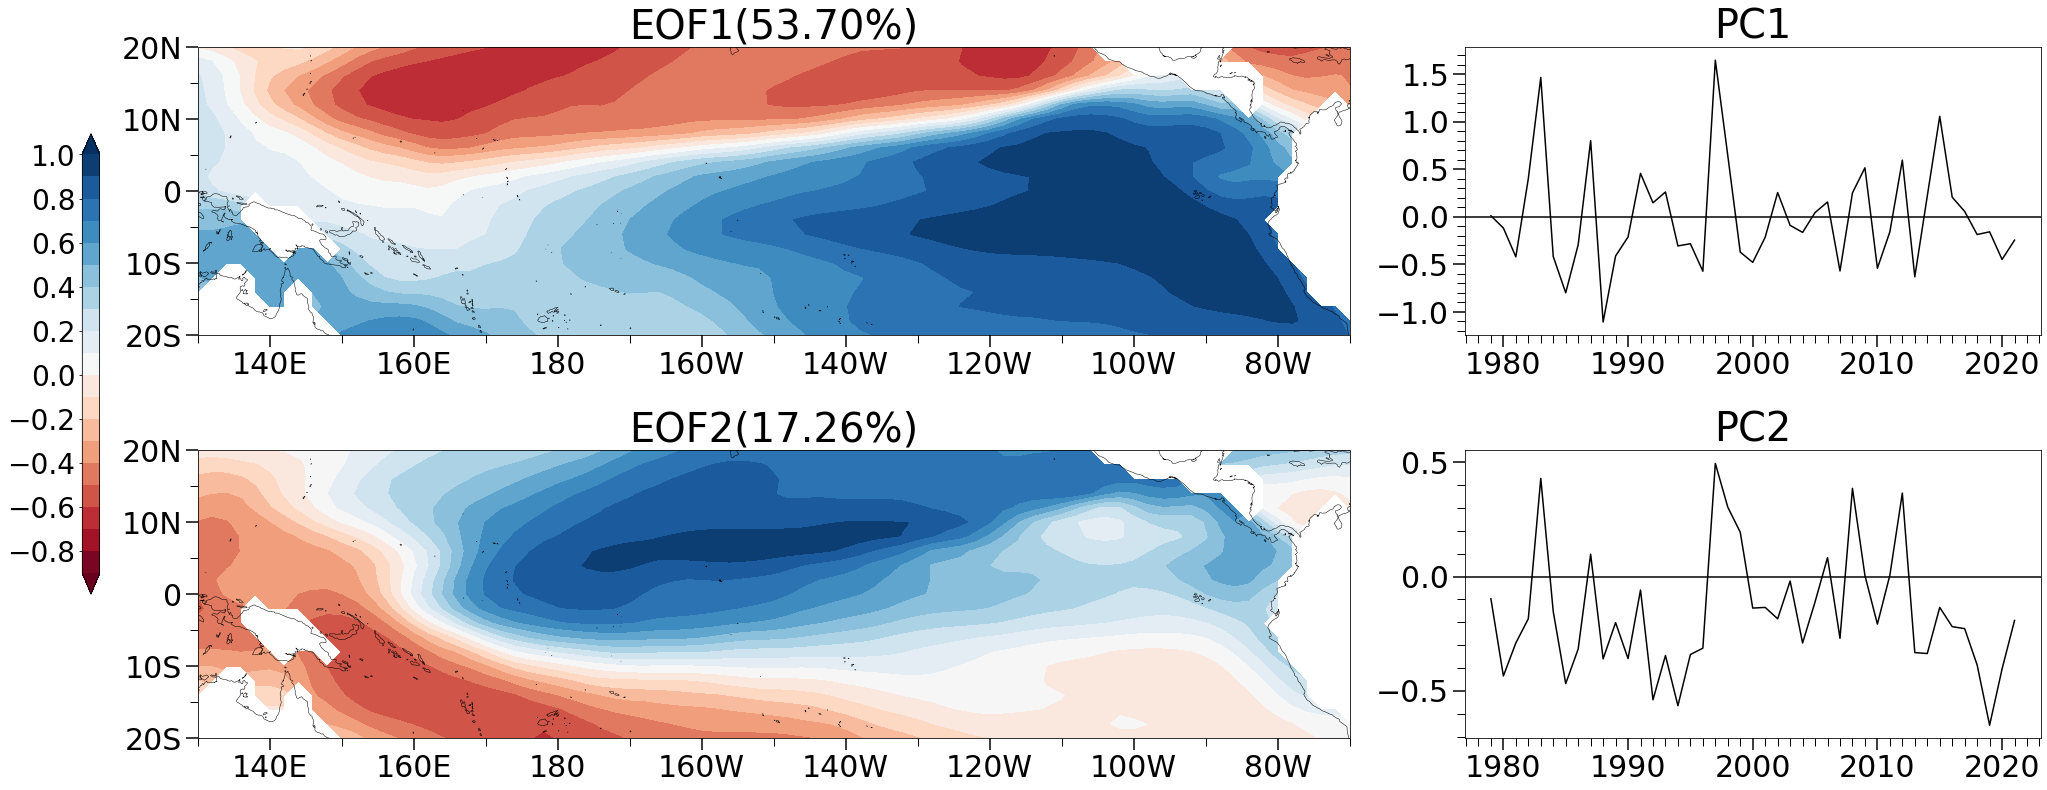

In [6]:
#导入第三方库cartopy中需要用到的函数（为了加海岸线）
import cartopy.crs as ccrs
import cartopy.feature as cf

#创建画布
fig = plt.figure(figsize=(16,8))

ax1 = fig.add_axes([0,0.7,1,1],projection=ccrs.PlateCarree(central_longitude=180))
ax1.set_xticks(np.arange(130,290,10), crs=ccrs.PlateCarree())
ax1.set_yticks(np.arange(-20,20,10), crs=ccrs.PlateCarree())
ax1.set_extent([130, 290, -20, 20], crs=ccrs.PlateCarree())
ax1.add_feature(cf.COASTLINE,lw=0.5,zorder=2) #海岸线
con1 = ax1.contourf(X,Y,u_eof[0,:,:],levels=np.arange(-0.9,1.1,0.1),transform=ccrs.PlateCarree(),cmap='RdBu',extend='both')
ax1.set_xticks([-40,-20,0,20,40,60,80,100])
ax1.set_xticklabels(['140E','160E','180','160W','140W','120W','100W','80W'],fontsize=30)
ax1.xaxis.set_minor_locator(MultipleLocator(10))
ax1.tick_params(axis='x',which='major',direction='out',length=12,width=1.5)
ax1.tick_params(axis='x',which='minor',direction='out',length=8,width=1)
ax1.set_yticks([-20,-10,0,10,20])
ax1.set_yticklabels(['20S','10S','0','10N','20N'],fontsize=30)
ax1.yaxis.set_minor_locator(MultipleLocator(5))
ax1.tick_params(axis='y',which='major',direction='out',length=12,width=1.5)
ax1.tick_params(axis='y',which='minor',direction='out',length=8,width=1)
ax1.set_title('EOF1(53.70%)',fontsize=40)
    
ax2 = fig.add_axes([1.1,0.95,0.5,0.5])
ax2.plot(years,pc1,c='k')
ax2.axhline(y=0,c='k')
ax2.xaxis.set_major_locator(MultipleLocator(10))
ax2.xaxis.set_minor_locator(MultipleLocator(1))
ax2.yaxis.set_major_locator(MultipleLocator(0.5))
ax2.yaxis.set_minor_locator(MultipleLocator(0.1))
ax2.tick_params(axis='x',which='major',direction='out',length=12,width=1.5,labelsize=30)
ax2.tick_params(axis='x',which='minor',direction='out',length=8,width=1)
ax2.tick_params(axis='y',which='major',direction='out',length=12,width=1.5,labelsize=30)
ax2.tick_params(axis='y',which='minor',direction='out',length=8,width=1)
ax2.set_title('PC1',fontsize=40)

ax3 = fig.add_axes([0,0,1,1],projection=ccrs.PlateCarree(central_longitude=180))
ax3.set_xticks(np.arange(130,290,10), crs=ccrs.PlateCarree())
ax3.set_yticks(np.arange(-20,20,10), crs=ccrs.PlateCarree())
ax3.set_extent([130, 290, -20, 20], crs=ccrs.PlateCarree())
ax3.add_feature(cf.COASTLINE,lw=0.5,zorder=2) #海岸线
ax3.contourf(X,Y,u_eof[1,:,:],levels=np.arange(-0.9,1.1,0.1),transform=ccrs.PlateCarree(),cmap='RdBu_r')
ax3.set_xticks([-40,-20,0,20,40,60,80,100])
ax3.set_xticklabels(['140E','160E','180','160W','140W','120W','100W','80W'],fontsize=30)
ax3.xaxis.set_minor_locator(MultipleLocator(10))
ax3.tick_params(axis='x',which='major',direction='out',length=12,width=1.5)
ax3.tick_params(axis='x',which='minor',direction='out',length=8,width=1)
ax3.set_yticks([-20,-10,0,10,20])
ax3.set_yticklabels(['20S','10S','0','10N','20N'],fontsize=30)
ax3.yaxis.set_minor_locator(MultipleLocator(5))
ax3.tick_params(axis='y',which='major',direction='out',length=12,width=1.5)
ax3.tick_params(axis='y',which='minor',direction='out',length=8,width=1)
ax3.set_title('EOF2(17.26%)',fontsize=40)

ax4 = fig.add_axes([1.1,0.25, 0.5, 0.5])
ax4.plot(years,pc2,c='k')
ax4.axhline(y=0,c='k')
ax4.xaxis.set_major_locator(MultipleLocator(10))
ax4.xaxis.set_minor_locator(MultipleLocator(1))
ax4.yaxis.set_major_locator(MultipleLocator(0.5))
ax4.yaxis.set_minor_locator(MultipleLocator(0.1))
ax4.tick_params(axis='x',which='major',direction='out',length=12,width=1.5,labelsize=30)
ax4.tick_params(axis='x',which='minor',direction='out',length=8,width=1)
ax4.tick_params(axis='y',which='major',direction='out',length=12,width=1.5,labelsize=30)
ax4.tick_params(axis='y',which='minor',direction='out',length=8,width=1)
ax4.set_title('PC2',fontsize=40)

#设置colorbar
l,b,w,h = -0.1, 0.5, 0.015, 0.8
rect = [l,b,w,h]
cbar_ax = fig.add_axes(rect)
cb = fig.colorbar(con1, cax = cbar_ax,orientation='vertical',extend='both',ticklocation='left')
cb.ax.tick_params(labelsize=28)